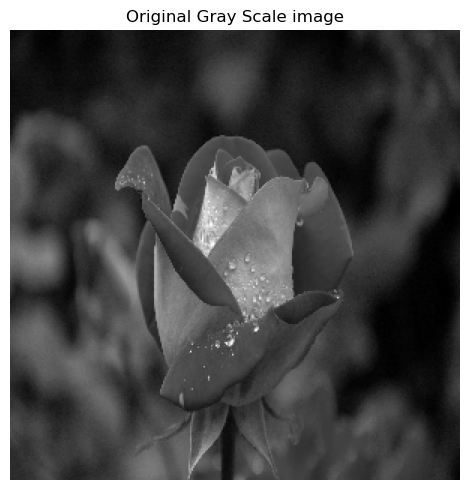

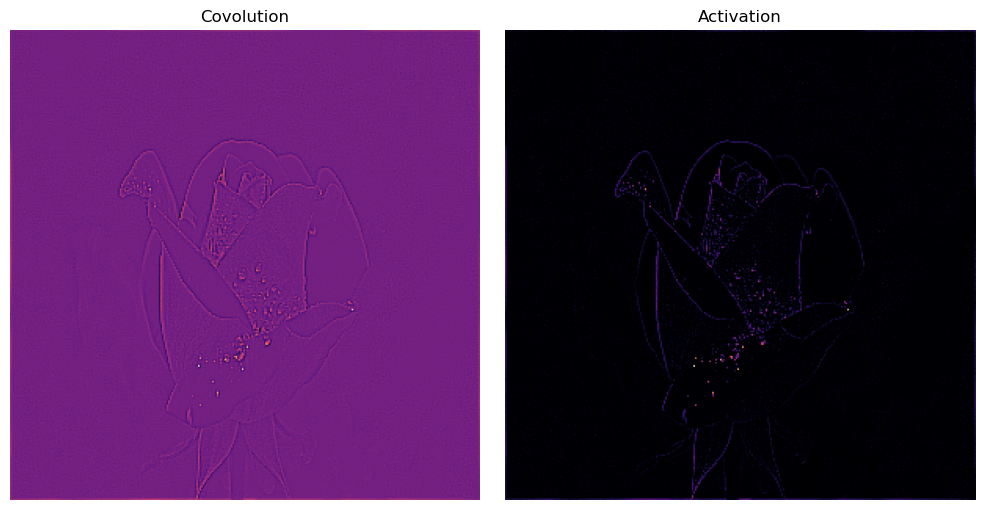

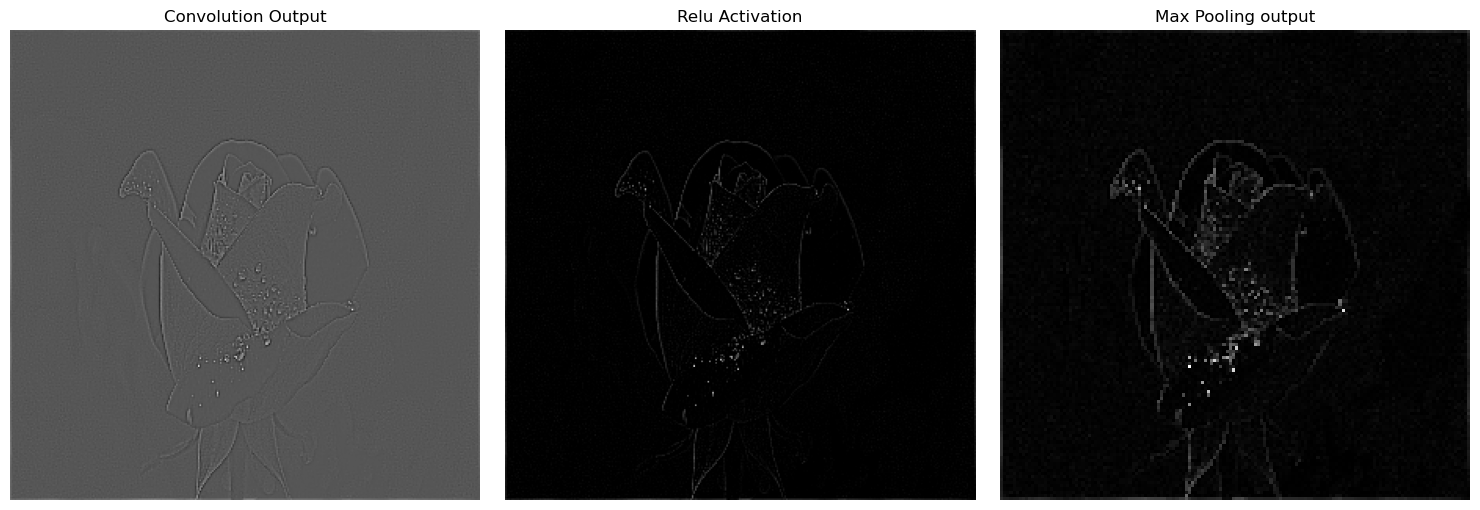

In [22]:
# Implement Image Edge Detection using Convolution Nerual Network(CNN) Layers with Tensorflow.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# Set the param
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

# Define the kernel
kernel=tf.constant([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

# Load  the iamge
image=tf.io.read_file('Rose.jpg')
image=tf.io.decode_jpeg(image,channels=1)
image=tf.image.resize(image,size=[300,300])

# Plot the image
img=tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();

# Reformat
image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)
kernel=tf.reshape(kernel,[*kernel.shape,1,1])
kernel=tf.cast(kernel,dtype=tf.float32)

# Convolution layer
conv_fn=tf.nn.conv2d
image_filter=conv_fn(input=image,filters=kernel,strides=1,padding='SAME',)
plt.figure(figsize=(15,5))


# Plot the convolved iamge
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Covolution')

#activation layer
relu_fn=tf.nn.relu

#Image detection
image_detect=relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

#Pooling Layer(fixed)
image_condense=tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME')

# Disply All Result
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter),cmap='gray')
plt.title('Convolution Output')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect),cmap='gray')
plt.title('Relu Activation')
plt.axis('off') 

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense),cmap='gray')
plt.title('Max Pooling output')
plt.axis('off')

plt.show()
